# **Rent Price Prediction Model**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

## Análise Exploratória

In [2]:
raw_data = pd.read_csv("teste_indicium_precificacao.csv")

In [3]:
raw_data.shape

(48894, 16)

In [4]:
raw_data.head(10)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
8,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
9,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6


In [5]:
raw_data.tail()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48893,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


## Verificação dos tipos de dados

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

## Verificação dos valores nulos

In [7]:
raw_data.isnull().sum().sort_values(ascending=False)

ultima_review                    10052
reviews_por_mes                  10052
host_name                           21
nome                                16
id                                   0
host_id                              0
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [8]:
(raw_data.isnull().sum()/raw_data.shape[0]).sort_values(ascending=False)

ultima_review                    0.205588
reviews_por_mes                  0.205588
host_name                        0.000430
nome                             0.000327
id                               0.000000
host_id                          0.000000
bairro_group                     0.000000
bairro                           0.000000
latitude                         0.000000
longitude                        0.000000
room_type                        0.000000
price                            0.000000
minimo_noites                    0.000000
numero_de_reviews                0.000000
calculado_host_listings_count    0.000000
disponibilidade_365              0.000000
dtype: float64

## Informações estatísticas

In [9]:
raw_data.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Análise visual de como os dados estão distribuídos

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimo_noites'}>],
       [<Axes: title={'center': 'numero_de_reviews'}>,
        <Axes: title={'center': 'reviews_por_mes'}>,
        <Axes: title={'center': 'calculado_host_listings_count'}>],
       [<Axes: title={'center': 'disponibilidade_365'}>, <Axes: >,
        <Axes: >]], dtype=object)

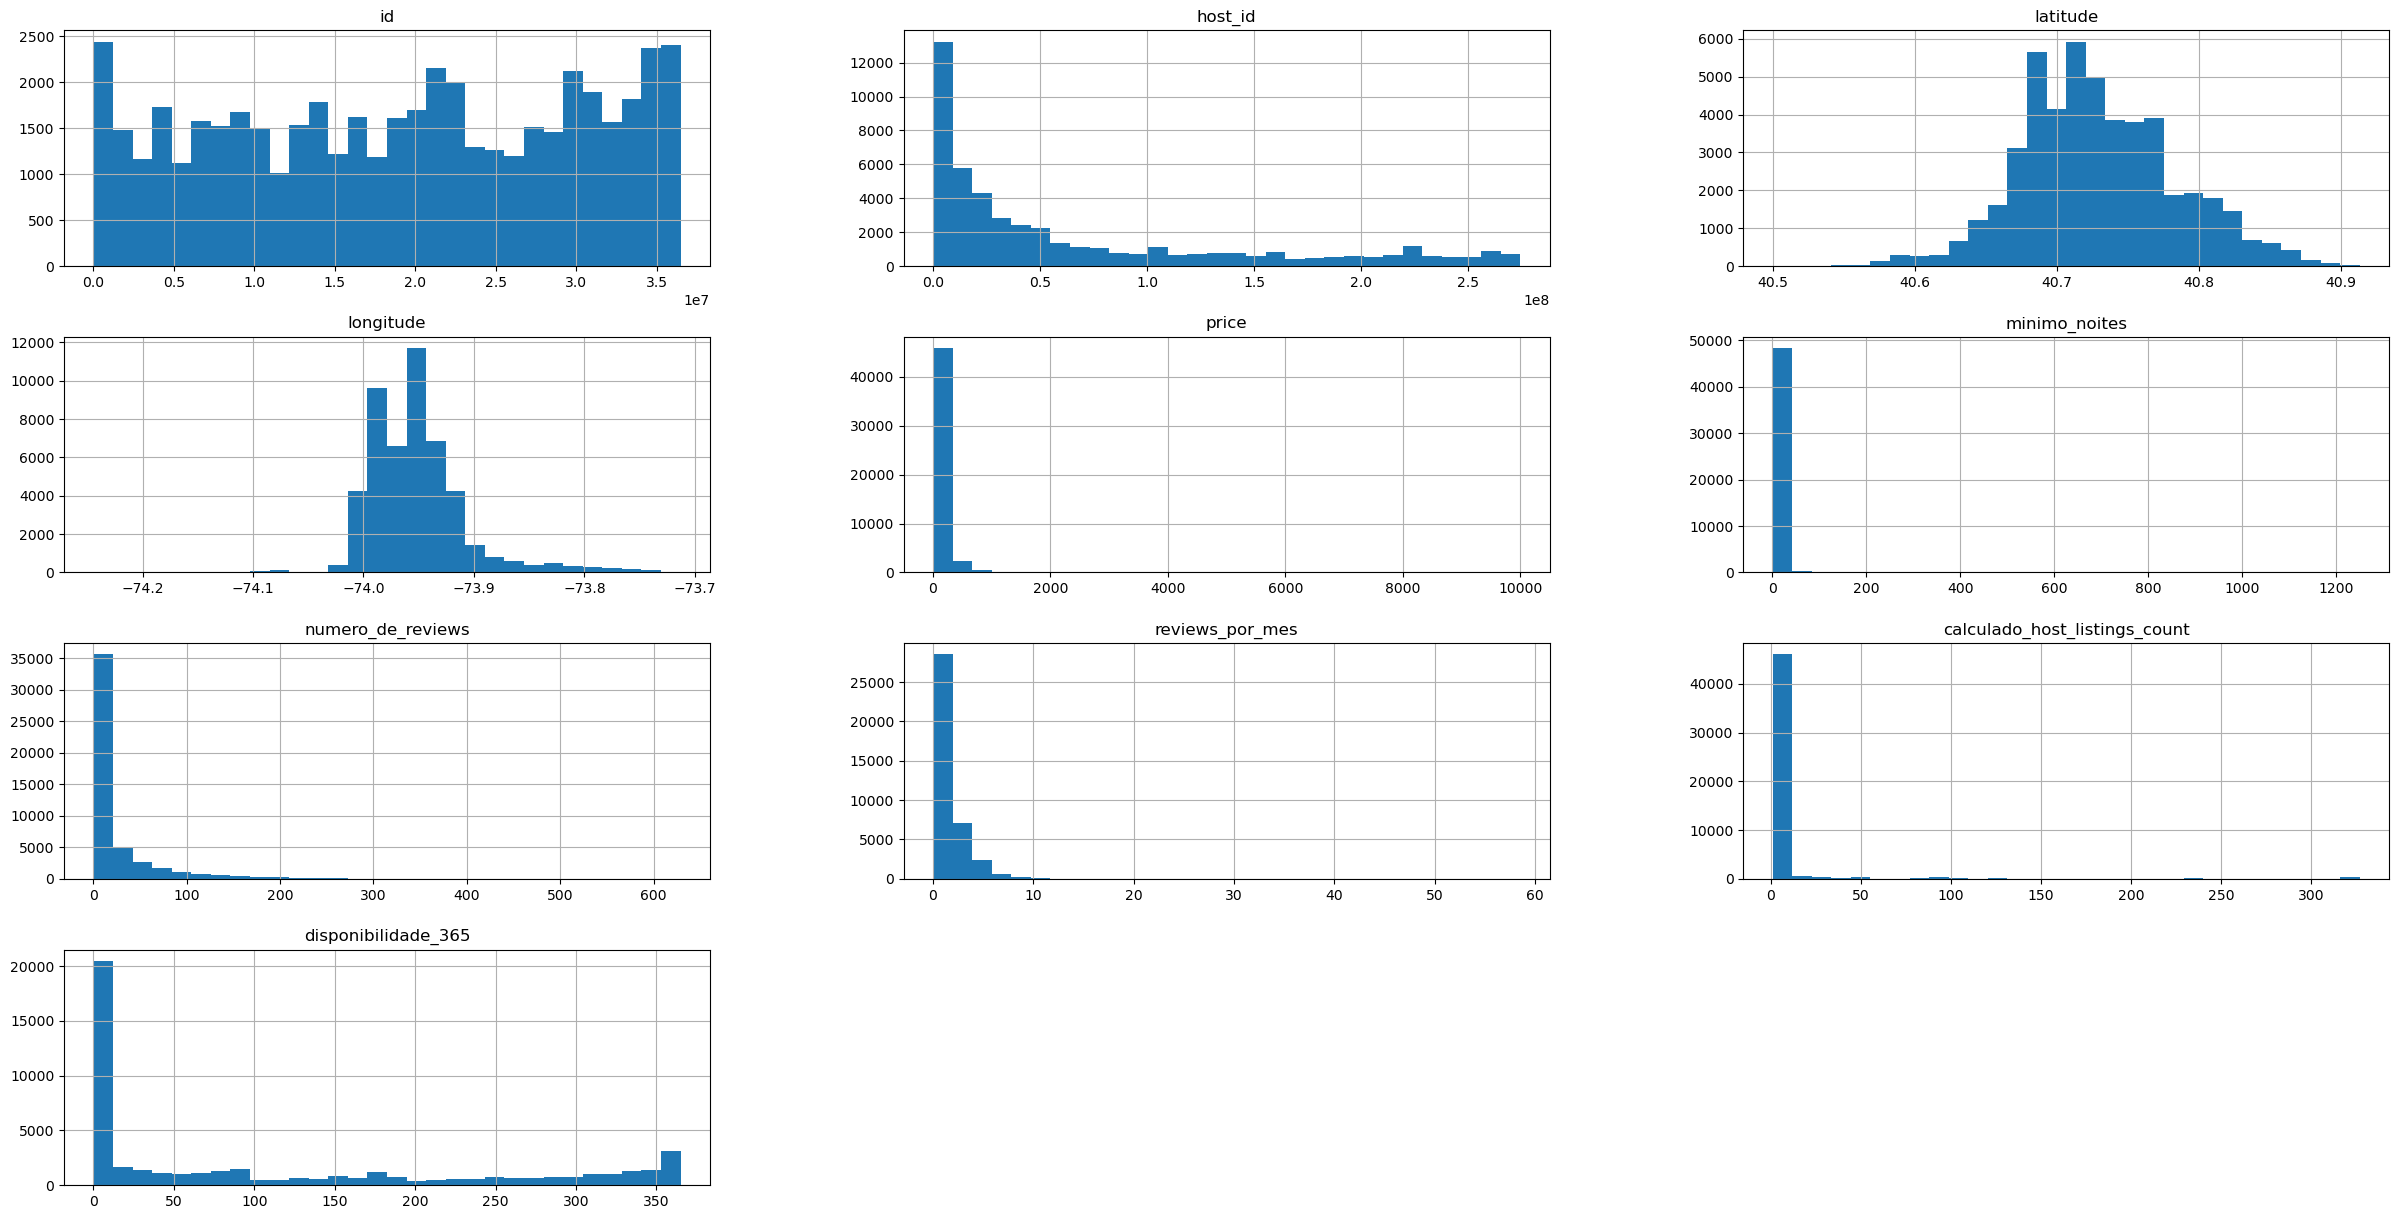

In [10]:
raw_data.hist(bins=30, figsize=(30,15))

### Cálculo da mediana do preço (valor central)

In [11]:
raw_data['price'].median()

106.0

### Cálculo da estatística por tipo de imóvel x preço

In [12]:
room_type_stats = raw_data.groupby('room_type')['price'].describe()
print(room_type_stats)

                   count        mean         std  min    25%    50%    75%  \
room_type                                                                    
Entire home/apt  25409.0  211.794246  284.041611  0.0  120.0  160.0  229.0   
Private room     22325.0   89.778320  160.208360  0.0   50.0   70.0   95.0   
Shared room       1160.0   70.127586  101.725252  0.0   33.0   45.0   75.0   

                     max  
room_type                 
Entire home/apt  10000.0  
Private room     10000.0  
Shared room       1800.0  


### Cálculo da estatística por tipo de imóvel x disponibilidade 

In [13]:
availability_stats = raw_data.groupby('room_type')['disponibilidade_365'].describe()
print(availability_stats)

                   count        mean         std  min  25%   50%    75%    max
room_type                                                                     
Entire home/apt  25409.0  111.920304  129.802937  0.0  0.0  42.0  229.0  365.0
Private room     22325.0  111.192564  132.084102  0.0  0.0  45.0  214.0  365.0
Shared room       1160.0  162.000862  151.347109  0.0  0.0  90.0  341.0  365.0


### Análise da relação entre o bairro e o preço

In [14]:
nb_stats = raw_data.groupby(['bairro_group', 'bairro'])[['price', 'disponibilidade_365']].mean().sort_values(by='price', ascending=False)
print(nb_stats)

                                   price  disponibilidade_365
bairro_group  bairro                                         
Staten Island Fort Wadsworth  800.000000           365.000000
              Woodrow         700.000000             0.000000
Manhattan     Tribeca         490.638418           126.508475
Brooklyn      Sea Gate        487.857143            65.571429
Bronx         Riverdale       442.090909           160.818182
...                                  ...                  ...
Staten Island New Dorp         57.000000             0.000000
Bronx         Soundview        53.466667           133.666667
              Tremont          51.545455           119.000000
              Hunts Point      50.500000           239.166667
Staten Island Bull's Head      47.333333           165.666667

[221 rows x 2 columns]


<Axes: xlabel='bairro_group', ylabel='price'>

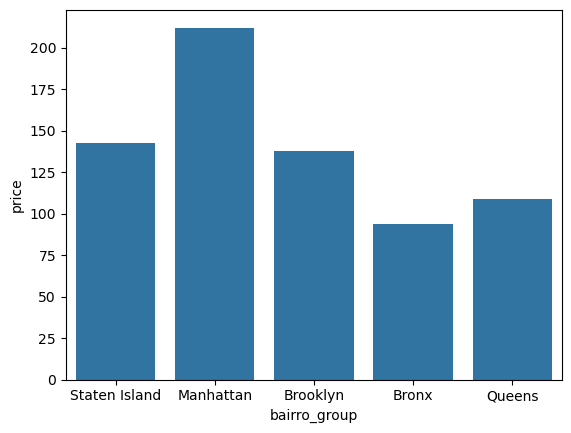

In [15]:
sns.barplot(data = nb_stats.reset_index(), x='bairro_group', y='price', errorbar=None)

### Análise de correlação entre o mínimo de noites, disponibilidade nos 365 dias e preço

In [16]:
cols = ['minimo_noites', 'disponibilidade_365', 'price']  
corr_matrix = raw_data[cols].corr()  
print(corr_matrix)  

                     minimo_noites  disponibilidade_365     price
minimo_noites             1.000000             0.144320  0.042799
disponibilidade_365       0.144320             1.000000  0.081833
price                     0.042799             0.081833  1.000000


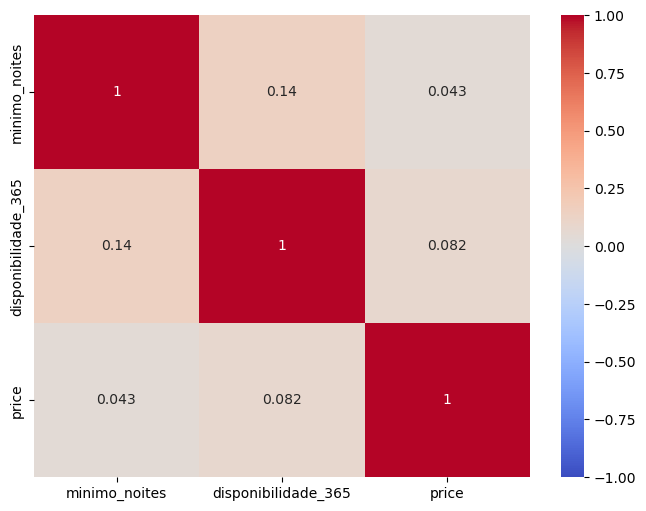

In [17]:
plt.figure(figsize=(8, 6))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)  
plt.show()  

#### *O mapa de calor indica correlação fraca entre o preço e as variáveis "mínimo_noites" e "disponibilidade_365" dias.

### Análise do impacto das palavras nos anúncios em relação ao preço

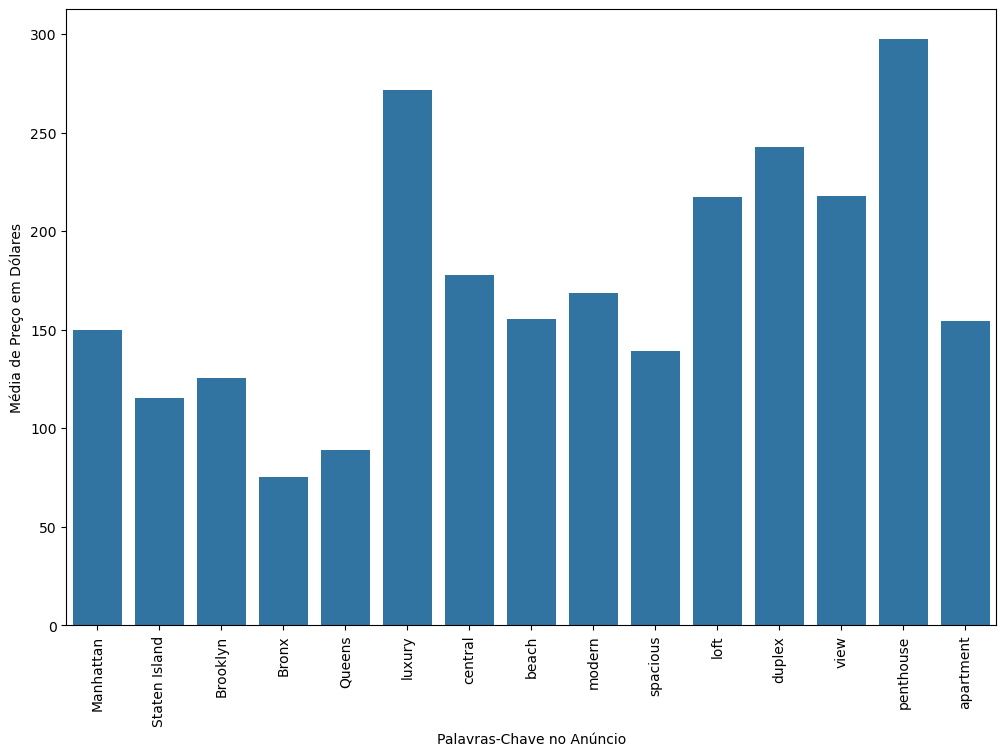

In [18]:
raw_data['nome'] = raw_data['nome'].fillna('')
keywords = ['Manhattan', 'Staten Island', 'Brooklyn', 'Bronx', 'Queens','luxury', 'central', 'beach', 'modern', 'spacious', 'loft', 'duplex', 'view', 'penthouse', 'apartment']

for keyword in keywords:
    raw_data[keyword] = raw_data['nome'].apply(lambda x: keyword.lower() in x.lower() if isinstance(x, str) else False)

keyword_price = {}
for keyword in keywords:
    keyword_price[keyword] = raw_data[raw_data[keyword]]['price'].mean()

plt.figure(figsize=(12, 8))
sns.barplot(x=list(keyword_price.keys()), y=list(keyword_price.values()))
plt.xlabel('Palavras-Chave no Anúncio')
plt.ylabel('Média de Preço em Dólares')
plt.xticks(rotation=90)
plt.show()

## Limpeza dos valores nulos no dataset

In [19]:
raw_data.isnull().sum().sort_values(ascending=False)

reviews_por_mes                  10052
ultima_review                    10052
host_name                           21
id                                   0
beach                                0
Bronx                                0
Queens                               0
luxury                               0
central                              0
modern                               0
Staten Island                        0
spacious                             0
loft                                 0
duplex                               0
view                                 0
penthouse                            0
Brooklyn                             0
disponibilidade_365                  0
Manhattan                            0
nome                                 0
calculado_host_listings_count        0
numero_de_reviews                    0
minimo_noites                        0
price                                0
room_type                            0
longitude                

## Processo para eliminação das colunas com porcentagem dos valores nulos

### Verificação das porcentagens dos valores nulos.

In [20]:
(raw_data.isnull().sum().sort_values(ascending=False)/raw_data.shape[0]) 

reviews_por_mes                  0.205588
ultima_review                    0.205588
host_name                        0.000430
id                               0.000000
beach                            0.000000
Bronx                            0.000000
Queens                           0.000000
luxury                           0.000000
central                          0.000000
modern                           0.000000
Staten Island                    0.000000
spacious                         0.000000
loft                             0.000000
duplex                           0.000000
view                             0.000000
penthouse                        0.000000
Brooklyn                         0.000000
disponibilidade_365              0.000000
Manhattan                        0.000000
nome                             0.000000
calculado_host_listings_count    0.000000
numero_de_reviews                0.000000
minimo_noites                    0.000000
price                            0

### Exclusão das colunas "reviews_por_mes", "ultima_reviwe" e "host_name"

In [21]:
raw_data.drop(columns = ['reviews_por_mes', 'ultima_review', 'host_name'], inplace=True)
print(raw_data.columns)

Index(['id', 'nome', 'host_id', 'bairro_group', 'bairro', 'latitude',
       'longitude', 'room_type', 'price', 'minimo_noites', 'numero_de_reviews',
       'calculado_host_listings_count', 'disponibilidade_365', 'Manhattan',
       'Staten Island', 'Brooklyn', 'Bronx', 'Queens', 'luxury', 'central',
       'beach', 'modern', 'spacious', 'loft', 'duplex', 'view', 'penthouse',
       'apartment'],
      dtype='object')


### Exclusão das colunas "id", "host_id", "bairro", "minimo_noites", "disponibilidade_365", "numero_de_reviews", "calculado_host_listings_count"

In [22]:
raw_data.drop(columns = ["id", "host_id", "bairro", "minimo_noites", "disponibilidade_365", "numero_de_reviews", "calculado_host_listings_count"], inplace=True)
print(raw_data.columns)

Index(['nome', 'bairro_group', 'latitude', 'longitude', 'room_type', 'price',
       'Manhattan', 'Staten Island', 'Brooklyn', 'Bronx', 'Queens', 'luxury',
       'central', 'beach', 'modern', 'spacious', 'loft', 'duplex', 'view',
       'penthouse', 'apartment'],
      dtype='object')


### Verificação dos tipos de dados das colunas que restaram

In [23]:
print(raw_data.dtypes)

nome              object
bairro_group      object
latitude         float64
longitude        float64
room_type         object
price              int64
Manhattan           bool
Staten Island       bool
Brooklyn            bool
Bronx               bool
Queens              bool
luxury              bool
central             bool
beach               bool
modern              bool
spacious            bool
loft                bool
duplex              bool
view                bool
penthouse           bool
apartment           bool
dtype: object


### Transformação das palavras-chave na variável "nome" para a forma binária

In [24]:
key_words = ["penthouse","luxury", "duplex", "view", "loft"]
for keyword in key_words:
    raw_data[f"contains_{keyword}"] = raw_data["nome"].str.contains(keyword, case= False, na= False).astype(int)

In [25]:
print(raw_data.dtypes)

nome                   object
bairro_group           object
latitude              float64
longitude             float64
room_type              object
price                   int64
Manhattan                bool
Staten Island            bool
Brooklyn                 bool
Bronx                    bool
Queens                   bool
luxury                   bool
central                  bool
beach                    bool
modern                   bool
spacious                 bool
loft                     bool
duplex                   bool
view                     bool
penthouse                bool
apartment                bool
contains_penthouse      int64
contains_luxury         int64
contains_duplex         int64
contains_view           int64
contains_loft           int64
dtype: object


In [26]:
raw_data.drop(columns = ["nome"], inplace=True)
print(raw_data.dtypes)

bairro_group           object
latitude              float64
longitude             float64
room_type              object
price                   int64
Manhattan                bool
Staten Island            bool
Brooklyn                 bool
Bronx                    bool
Queens                   bool
luxury                   bool
central                  bool
beach                    bool
modern                   bool
spacious                 bool
loft                     bool
duplex                   bool
view                     bool
penthouse                bool
apartment                bool
contains_penthouse      int64
contains_luxury         int64
contains_duplex         int64
contains_view           int64
contains_loft           int64
dtype: object


### Transformação do conteúdo das novas colunas para o tipo boleano

In [27]:
for colum in raw_data.columns:
    if colum.startswith("contains_"):
        raw_data[colum] = raw_data[colum].astype(bool)

print(raw_data.dtypes)

bairro_group           object
latitude              float64
longitude             float64
room_type              object
price                   int64
Manhattan                bool
Staten Island            bool
Brooklyn                 bool
Bronx                    bool
Queens                   bool
luxury                   bool
central                  bool
beach                    bool
modern                   bool
spacious                 bool
loft                     bool
duplex                   bool
view                     bool
penthouse                bool
apartment                bool
contains_penthouse       bool
contains_luxury          bool
contains_duplex          bool
contains_view            bool
contains_loft            bool
dtype: object


### Transformação do conteúdo das colunas restantes do tipo object para o tipo inteiro (0 ou 1)


In [28]:
raw_data = pd.get_dummies(raw_data, columns = ["bairro_group", "room_type"], drop_first =False, dtype= int)
print(raw_data.dtypes)

latitude                      float64
longitude                     float64
price                           int64
Manhattan                        bool
Staten Island                    bool
Brooklyn                         bool
Bronx                            bool
Queens                           bool
luxury                           bool
central                          bool
beach                            bool
modern                           bool
spacious                         bool
loft                             bool
duplex                           bool
view                             bool
penthouse                        bool
apartment                        bool
contains_penthouse               bool
contains_luxury                  bool
contains_duplex                  bool
contains_view                    bool
contains_loft                    bool
bairro_group_Bronx              int64
bairro_group_Brooklyn           int64
bairro_group_Manhattan          int64
bairro_group

In [29]:
print(raw_data['Bronx'].value_counts())

Bronx
False    48715
True       179
Name: count, dtype: int64


### Exclusão das colunas "Manhattan", "Staten Island", "Brooklyn", "Bronx" e "Queens"

#### **OBS:** O bairro Bronx será removido por ter baixa representatividade no dataset

In [30]:
raw_data.drop(columns = ["Bronx", "Manhattan", "Staten Island", "Brooklyn", "Queens"], inplace=True)
print(raw_data.dtypes)

latitude                      float64
longitude                     float64
price                           int64
luxury                           bool
central                          bool
beach                            bool
modern                           bool
spacious                         bool
loft                             bool
duplex                           bool
view                             bool
penthouse                        bool
apartment                        bool
contains_penthouse               bool
contains_luxury                  bool
contains_duplex                  bool
contains_view                    bool
contains_loft                    bool
bairro_group_Bronx              int64
bairro_group_Brooklyn           int64
bairro_group_Manhattan          int64
bairro_group_Queens             int64
bairro_group_Staten Island      int64
room_type_Entire home/apt       int64
room_type_Private room          int64
room_type_Shared room           int64
dtype: objec

### Escalonamento das Variáveis Numéricas

In [31]:
numeric_features = ["latitude", "longitude"]
scaler = StandardScaler()
raw_data[numeric_features] = scaler.fit_transform(raw_data[numeric_features])

In [32]:
raw_data[numeric_features].describe()

,latitude,longitude
count,4.889400e+04,4.889400e+04
mean,4.655106e-14,-1.842360e-13
std,1.000010e+00,1.000010e+00
min,-4.202557e+00,-6.331717e+00
25%,-7.124771e-01,-6.694767e-01
50%,-1.077512e-01,-7.606269e-02
75%,6.265851e-01,3.444076e-01
max,3.376369e+00,5.181902e+00


#### *Após escalonamento da latitude e longitude aparentemente a normalização destes dados foi realizada sem perda de informação.

### Tratamento da discrepância no preço (outliers)

In [33]:
raw_data['price'].describe()


count    48894.000000
mean       152.720763
std        240.156625
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

### Aplicação da técnica do intervalo interquartil (IQR) para identificar os outliers

In [34]:
Q1 = raw_data['price'].quantile(0.25)
Q3 = raw_data['price'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = raw_data[(raw_data["price"] < lower_limit) | (raw_data["price"] > upper_limit)]
print(f"Quantidade: {len(outliers)} outliers")

Quantidade: 2972 outliers


### Representação visual dos outliers

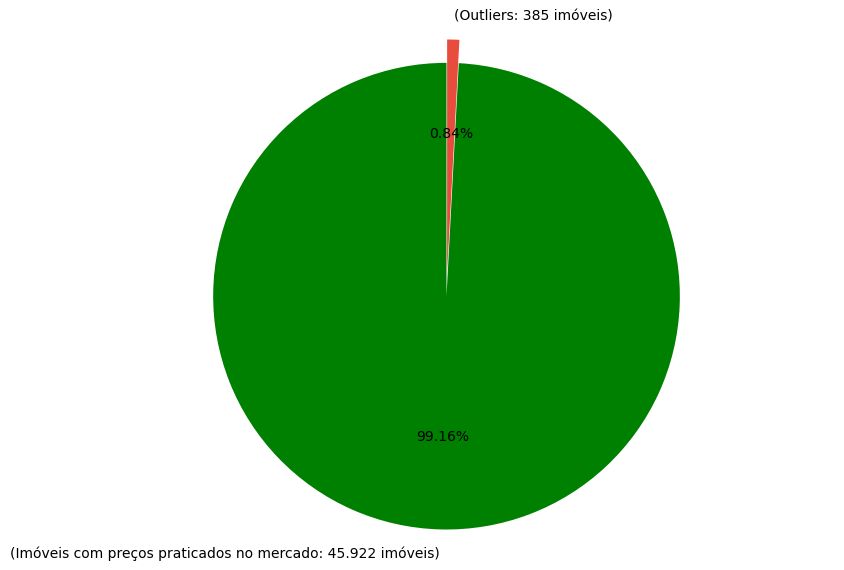

In [35]:
total_properties = 45922
outliers = 385
normal = total_properties - outliers

sizes = [normal, outliers]
labels = ["(Imóveis com preços praticados no mercado: 45.922 imóveis)", "(Outliers: 385 imóveis)"]
colors = ["#008000", "#e74c3c"]

plt.figure(figsize=(10,7))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.2f%%", 
        startangle=90, explode=(0, 0.1))
plt.axis("equal")
plt.show()

### Seleção das "features" (variáveis) para o treinamento do modelo

In [36]:
features = ["latitude", "longitude", "bairro_group_Bronx", "bairro_group_Brooklyn", "bairro_group_Manhattan", "bairro_group_Queens", 
            "bairro_group_Staten Island", "room_type_Entire home/apt", "room_type_Private room", "room_type_Shared room"]

### Definição da variável target

In [37]:
X = raw_data[features]
y = raw_data["price"]

## **Início da criação do modelo**

### Separação do conjunto de treino (70%) e teste (20%) 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)
print("Treino:", X_train.shape)
print("Teste:", X_test.shape)

Treino: (39115, 10)
Teste: (9779, 10)


### Criação do modelo de regressão linear

In [39]:
model = LinearRegression()

### Treinamento do modelo

In [40]:
model.fit(X_train, y_train)

LinearRegression()

### Predição do preço

In [41]:
y_pred = model.predict(X_test)

In [42]:
print(y_pred[:5])

[259.8461776  213.00788615 250.82479422 228.35676561  76.21424404]


### Valores reais (teste)

In [43]:
print(y_test[:5])

11912    650
2206     130
17212    275
26086    225
19046     46
Name: price, dtype: int64


### **Conclusão parcial**

Os valores que o modelo está prevendo estão muito distantes dos valores reais.

## Análise de performance

### Cálculo do Erro Médio Absoluto (MAE)

In [44]:
mean_error = mean_absolute_error(y_test, y_pred)

In [45]:
print(f"MAE:${mean_error:.2f} doláres")

MAE:$70.21 doláres


### Cálculo do R2 (verificação de quantas vezes o modelo acerta)

In [46]:
r2 = r2_score(y_test, y_pred)

In [47]:
print(f"R²: {r2:.2f}") 

R²: 0.12


#### O resultado indica que o modelo está acertando apenas 12% das predições.

### Avaliação com o modelo Random Forest

In [48]:
rf_model = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
rf_model.fit(X_train, y_train)

/home/rafael/Applications/anaconda3/envs/DATA_SCIENCE/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [49]:
rf_pred = rf_model.predict(X_test)

In [50]:
print(rf_pred)

[178.5 196.3 257.5 ...  75.5 185.3 128.9]


In [51]:
rf_mae = mean_absolute_error(y_test, rf_pred)

In [52]:
print(f"MAE: ${rf_mae:.2f}")

MAE: $77.29


In [53]:
rf_r2 = r2_score(y_test, rf_pred)

In [54]:
print(f"R²: {rf_r2:.4f}")

R²: -0.2755


## **Conclusão**

#### Os modelos 'LinearRegression' e 'RandomForestRegression' estão aquém dos resultados esperados. Ambos estão errando acima dos $70 dolares para cada predição. Portanto, requer uma análise mais detalhada das etapas anteriores, especialmente no que diz respeito à escolha de features, escalonamento da longitude e latitude e outliers no preço.